In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from typing import DefaultDict

In [2]:
DATASETS = {
    "Chest14": {"csv":"datasets/chest-14.csv"},
    "CheXpert": {"csv":"datasets/chexpert.csv"},
    "Chest X-ray Pneumonia": {"csv":"datasets/chest-xray-pneumonia.csv"},
    "RSNA": {"csv":"datasets/rsna.csv"},
    "GB7-FLG": {"csv":"datasets/gb7-flg.csv"},
    "TBX11K":{"csv": "datasets/tbx11k.csv"},
    "VinBigData":{"csv":"datasets/vinbigdata.csv"}
}

In [3]:
for dataset_name in DATASETS.keys():
    df = pd.read_csv(DATASETS[dataset_name]["csv"]) 
    DATASETS[dataset_name]["df"] = df
    DATASETS[dataset_name]["train"] = {}
    train_df = df[df["Phase"] == "train"]
    DATASETS[dataset_name]["train"][0] = train_df[train_df["Target"] == 0].shape[0]
    DATASETS[dataset_name]["train"][1] = train_df[train_df["Target"] == 1].shape[0]
    
    DATASETS[dataset_name]["val"] = {}
    val_df = df[df["Phase"] == "val"]
    DATASETS[dataset_name]["val"][0] = val_df[val_df["Target"] == 0].shape[0]
    DATASETS[dataset_name]["val"][1] = val_df[val_df["Target"] == 1].shape[0]
    
    DATASETS[dataset_name]["test"] = {}
    test_df = df[df["Phase"] == "test"]
    DATASETS[dataset_name]["test"][0] = test_df[test_df["Target"] == 0].shape[0]
    DATASETS[dataset_name]["test"][1] = test_df[test_df["Target"] == 1].shape[0]

# Full picture

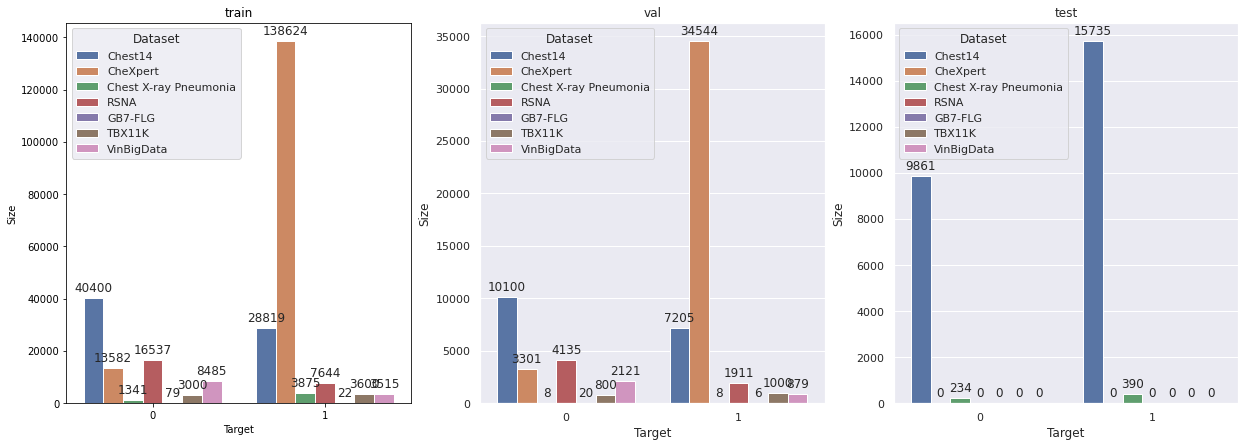

In [4]:
plt.figure(figsize=(21, 7))
phases = ["train", "val", "test"]
for phase_idx in range(len(phases)):
    phase = phases[phase_idx]
    data = []
    for dataset_name in DATASETS.keys():
        for target in [0,1]:
            item = {}
            item["Dataset"] = dataset_name
            item["Target"] = target
            item["Size"] = DATASETS[dataset_name][phase][target]
            
            data.append(item)
    data = pd.DataFrame(data)
    
    
    plt.subplot(1,3,phase_idx+1)
    sns.set_theme(style="darkgrid", palette="deep")
    splot = sns.barplot(x="Target", y="Size", hue="Dataset", data=data, )
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    plt.title(phase)
plt.show()

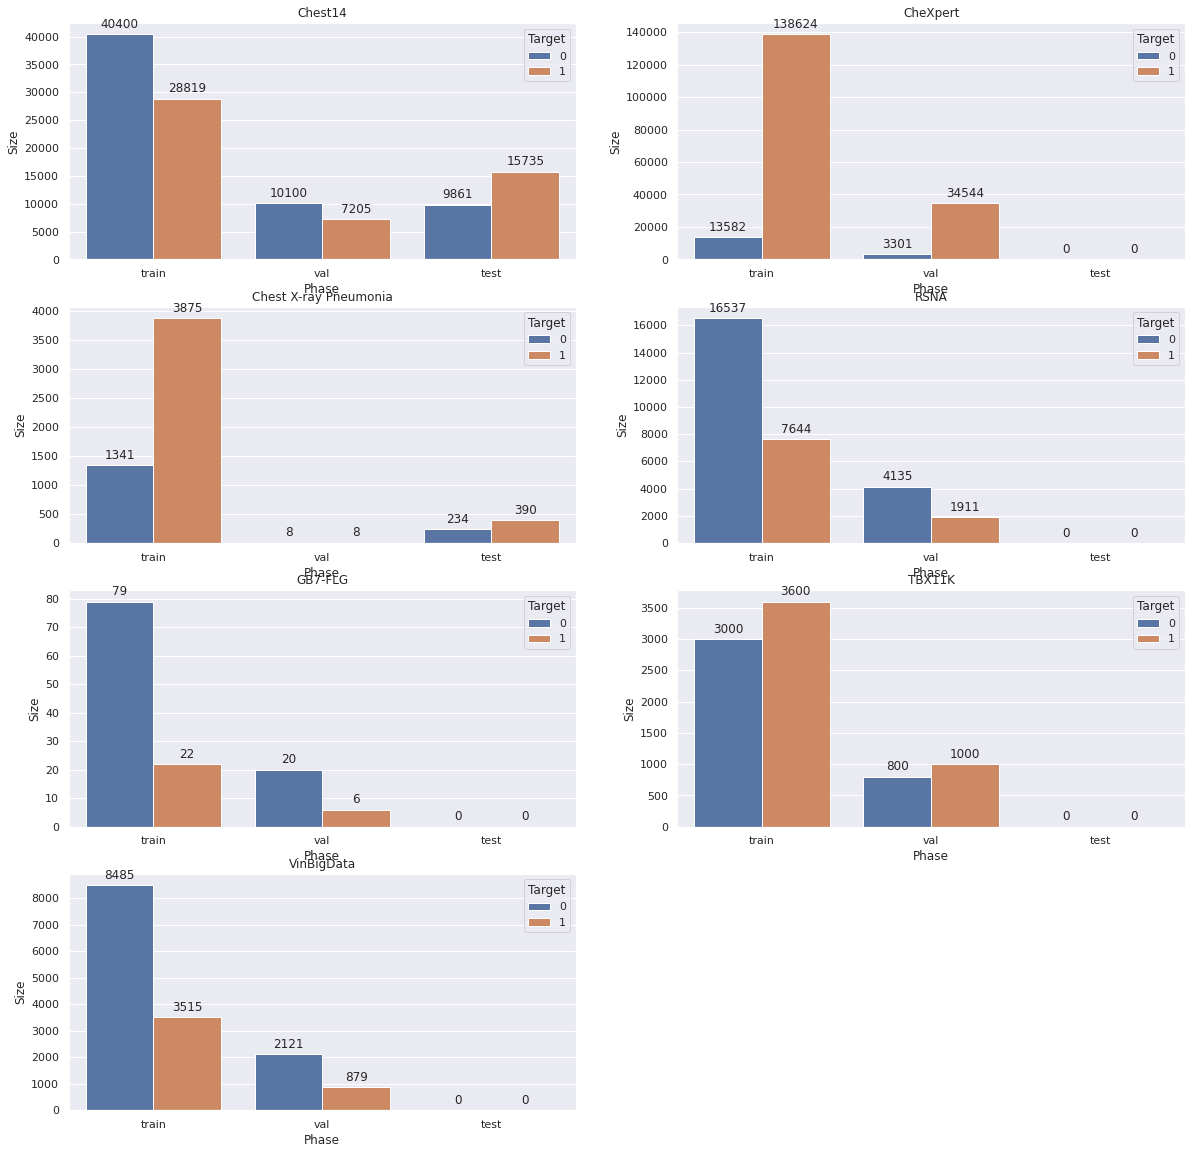

In [6]:
plt.figure(figsize=(20, 20))
datasets = list(DATASETS.keys())
for dataset_idx in range(len(datasets)):
    dataset = datasets[dataset_idx]
    data = []
    for phase in ["train", "val", "test"]:
        for target in [0,1]:
            item = {}
            item["Phase"] = phase
            item["Target"] = target
            item["Size"] = DATASETS[dataset][phase][target]
            
            data.append(item)
    data = pd.DataFrame(data)
    
    
    plt.subplot(4,2,dataset_idx+1)
    sns.set_theme(style="darkgrid", palette="deep")
    splot = sns.barplot(x="Phase", y="Size", hue="Target", data=data)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    plt.title(dataset)
plt.show()

# Chexpert - show the distribution of labeles for each finding.

In [4]:
def show_chexpert_distribution(df, finding_list):
    print(df.shape)
    plt.figure(figsize=(10, 10))
    data = []
    for phase in ['train']: #, 'val', 'test']:
        ds_phase = df[df["Frontal/Lateral"] == "Frontal"] #[df['Phase']==phase]
        print(len(ds_phase))
        for finding in finding_list:
            item = {}
            item["Finding"] = finding
            item["Phase"] = phase
            item["Size"] = len(ds_phase[(ds_phase[finding]==1.0) |(ds_phase[finding]==-1.0)])
        
            data.append(item)
    print(data)
    data = pd.DataFrame(data)    
    sns.set_theme(style="darkgrid", palette="deep")
    splot = sns.barplot(x="Phase", y="Size", hue="Finding", data=data)
    
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    
    plt.show()

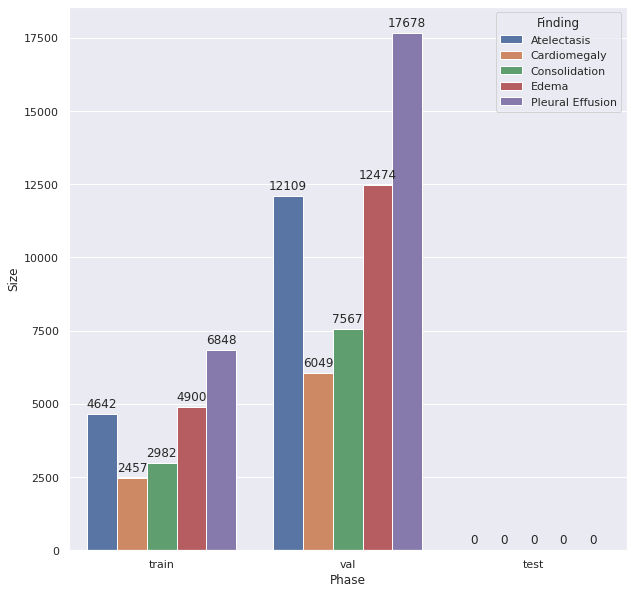

In [3]:
show_chexpert_distribution(pd.read_csv("datasets/chexpert_5_01.csv"), 
                           ['Atelectasis','Cardiomegaly','Consolidation','Edema', 'Pleural Effusion'])

[{'Finding': 'Atelectasis', 'Phase': 'train', 'Size': 59251}, {'Finding': 'Cardiomegaly', 'Phase': 'train', 'Size': 29953}, {'Finding': 'Consolidation', 'Phase': 'train', 'Size': 37177}, {'Finding': 'Edema', 'Phase': 'train', 'Size': 61155}, {'Finding': 'Pleural Effusion', 'Phase': 'train', 'Size': 86048}, {'Finding': 'No Finding', 'Phase': 'train', 'Size': 16883}, {'Finding': 'Enlarged Cardiomediastinum', 'Phase': 'train', 'Size': 19368}, {'Finding': 'Lung Opacity', 'Phase': 'train', 'Size': 98143}, {'Finding': 'Lung Lesion', 'Phase': 'train', 'Size': 8093}, {'Finding': 'Pneumonia', 'Phase': 'train', 'Size': 20531}, {'Finding': 'Pneumothorax', 'Phase': 'train', 'Size': 20331}, {'Finding': 'Pleural Other', 'Phase': 'train', 'Size': 4287}, {'Finding': 'Fracture', 'Phase': 'train', 'Size': 7902}, {'Finding': 'Support Devices', 'Phase': 'train', 'Size': 107554}]


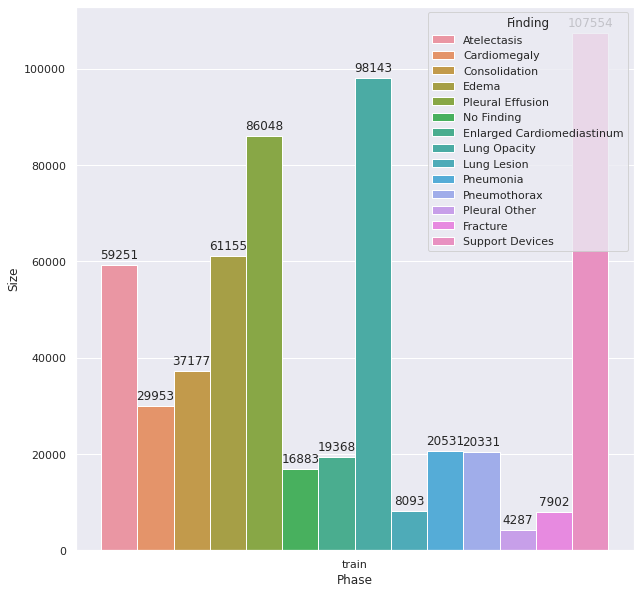

In [10]:
show_chexpert_distribution(pd.read_csv("datasets/chexpert_train_fixed.csv"), 
                           ['Atelectasis','Cardiomegaly','Consolidation','Edema', 'Pleural Effusion', 
                            'No Finding', 'Enlarged Cardiomediastinum','Lung Opacity', 'Lung Lesion',
                            'Pneumonia','Pneumothorax', 'Pleural Other','Fracture', 'Support Devices'])

In [5]:
len(pd.read_csv("datasets/chexpert.csv"))

190051

# Get csv with 6 rare findings 

In [150]:
df = pd.read_csv("datasets/chexpert_train_fixed.csv")

In [151]:
df = df[df["Frontal/Lateral"] == "Frontal"]

In [152]:
rare_findings = [
    "No Finding",
    "Enlarged Cardiomediastinum",
    "Lung Lesion",
    "Pneumonia",
    "Pneumothorax",
    "Fracture"]

In [153]:
rare_idx = df["No Finding"] == 10
for rare_f in rare_findings:
    rare_idx = rare_idx | ((df[rare_f] == 1.0) | (df[rare_f] == -1.0))
    
rare_df = df[rare_idx]

In [154]:
rare_df.shape

(82942, 21)

In [155]:
rare_df['Other'] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
other_fundings = ['Atelectasis','Cardiomegaly','Consolidation','Edema', 'Pleural Effusion', 'Lung Opacity', 'Pleural Other','Support Devices']
has_other = rare_df['Other'] == 1

for f in other_fundings:
    has_other = has_other | ((rare_df[f]==1.0)|(rare_df[f] == -1.0))
    
rare_df['Other'] = has_other.astype(np.uint8())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [157]:
total_df = rare_df

In [158]:
all_findings = ['Atelectasis','Cardiomegaly','Consolidation','Edema', 'Pleural Effusion', 
                            'No Finding', 'Enlarged Cardiomediastinum','Lung Opacity', 'Lung Lesion',
                            'Pneumonia','Pneumothorax', 'Pleural Other','Fracture', 'Support Devices', "Other"]

for f in all_findings:
    total_df[f] = (total_df[f].notnull() & (total_df[f] != 0.0)).astype(np.uint8())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [159]:
total_df.to_csv("datasets/chexpert_rare_6.csv")

(82942, 24)
82942
[{'Finding': 'No Finding', 'Phase': 'train', 'Size': 16883}, {'Finding': 'Enlarged Cardiomediastinum', 'Phase': 'train', 'Size': 19368}, {'Finding': 'Pneumonia', 'Phase': 'train', 'Size': 20531}, {'Finding': 'Pneumothorax', 'Phase': 'train', 'Size': 20331}, {'Finding': 'Lung Lesion', 'Phase': 'train', 'Size': 8093}, {'Finding': 'Fracture', 'Phase': 'train', 'Size': 7902}, {'Finding': 'Other', 'Phase': 'train', 'Size': 66665}]


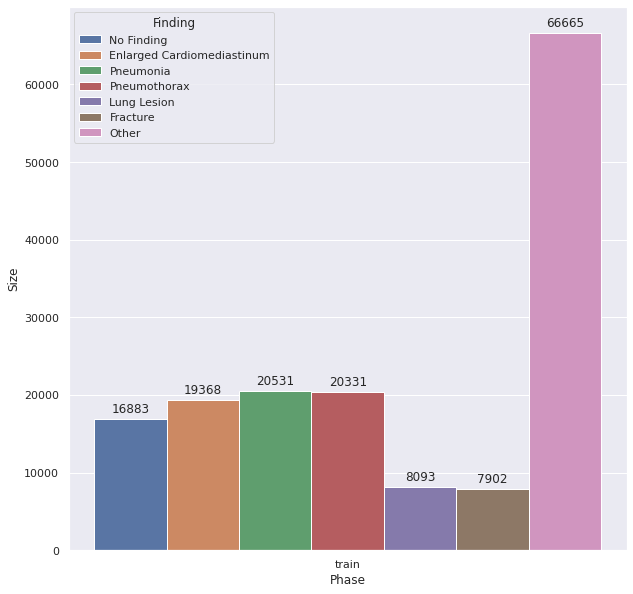

In [5]:
show_chexpert_distribution(pd.read_csv("datasets/chexpert_rare_6.csv"), 
                           ['No Finding', 'Enlarged Cardiomediastinum',
                            'Pneumonia','Pneumothorax','Lung Lesion', 'Fracture', 'Other'])

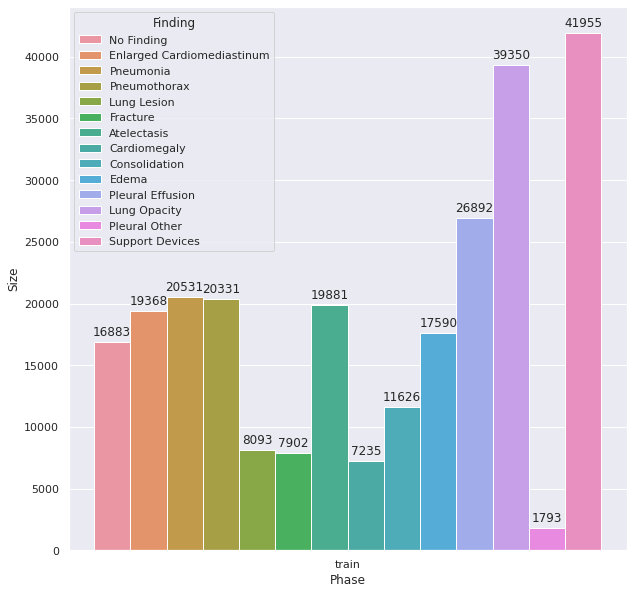

In [121]:
show_chexpert_distribution(pd.read_csv("datasets/chexpert_rare_6.csv"), 
                           ['No Finding', 'Enlarged Cardiomediastinum',
                            'Pneumonia','Pneumothorax','Lung Lesion', 'Fracture', 
                            'Atelectasis','Cardiomegaly','Consolidation','Edema', 'Pleural Effusion', 
                            'Lung Opacity','Pleural Other', 'Support Devices'])

In [101]:
total_df.shape

(82942, 22)

In [164]:
len(pd.read_csv("datasets/chexpert_rare_6.csv"))

82942